In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

Digital habits of Gen Z and their influence on stress and mood levels. 

In [3]:
df = pd.read_csv('Downloads/archive/digital_habits_vs_mental_health.csv')

In the digital age, people specality Gen Z spend hours daily on their devices — whether for work, social media, or entertainment. However, growing 
research suggests that excessive screen time might be negatively affecting mental health, especially in younger populations. The question is: how 
strong is this connection, and what patterns exist within different age groups and usage habits?

In [5]:
df.head()

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
0,10.3,2,5.3,4.4,10,5
1,6.5,5,3.5,6.2,8,8
2,9.1,4,2.8,6.6,7,8
3,6.5,3,2.5,6.5,7,9
4,2.1,3,1.2,7.8,2,10


The dataset consists of 100,000 rows and 6 columns with age group being Gen Z. It capturing their average daily screen time, Number of different social 
media platforms used daily, and self-reported mental health indicators such as stress levels, anxiety, sleep quality, and overall mood.

Is it true that social meadia effects Gen Z? 
How is screen time and Number of hours spend TikTok realted?
How is stress level and screen time affect each other?
Is this a time-series problem or classfication problem?
Is TikTok the most poupular social media now?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   screen_time_hours            100000 non-null  float64
 1   social_media_platforms_used  100000 non-null  int64  
 2   hours_on_TikTok              100000 non-null  float64
 3   sleep_hours                  100000 non-null  float64
 4   stress_level                 100000 non-null  int64  
 5   mood_score                   100000 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 4.6 MB


In [9]:
# Mood rating, on a scale of 1–10, where higher is better.
# stress level on a scale of 1–10, where 1 is low stress and 10 is high stress. 

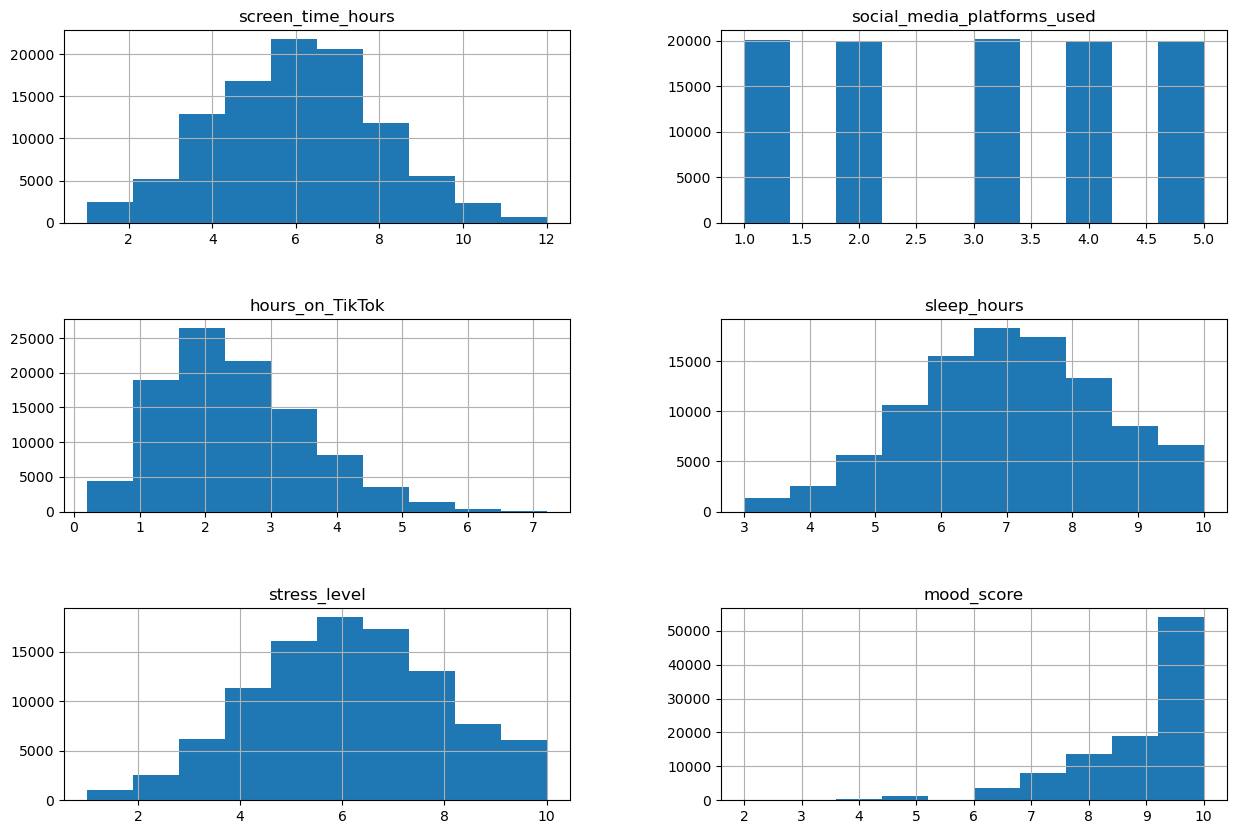

In [10]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

<Axes: xlabel='screen_time_hours', ylabel='hours_on_TikTok'>

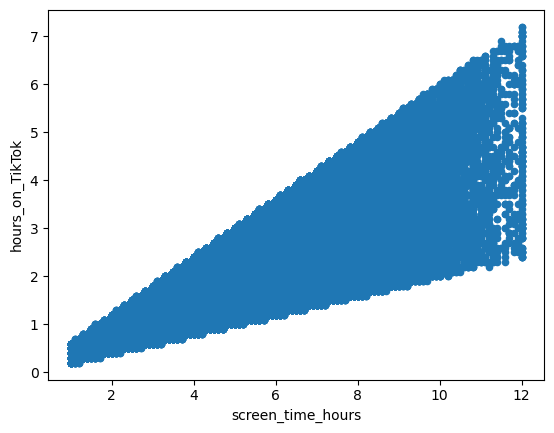

In [11]:
df.plot(x='screen_time_hours', y='hours_on_TikTok', kind='scatter')

Gen Z uses TikTok more than any other social media platform. 

Text(0.5, 1.0, 'Distribution of Number of Social Media Platforms Used')

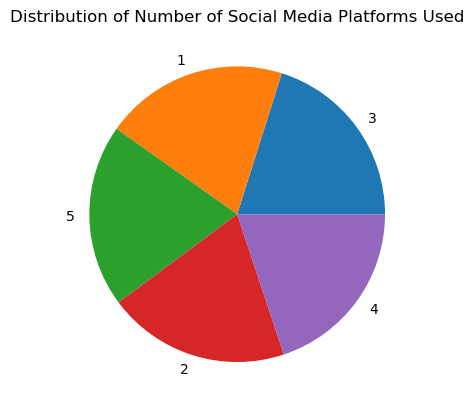

In [13]:
# Count the number of times each platform appears
platform_counts = df['social_media_platforms_used'].value_counts()

# Plot as bar chart
plt.pie(platform_counts.values, labels=platform_counts.index)
plt.title('Distribution of Number of Social Media Platforms Used')

This dataset has users with equaly spread of number of social media platfrom used. 

Text(0.5, 1.0, 'normal sleep vs normal stress and mood')

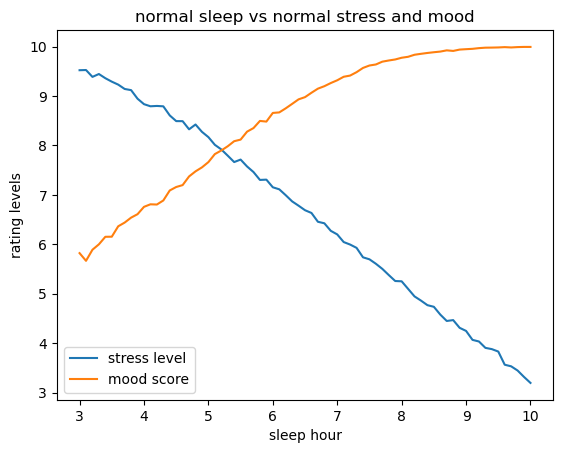

In [15]:
plt.plot(df.groupby('sleep_hours')['stress_level'].mean())
plt.plot(df.groupby('sleep_hours')['mood_score'].mean())
plt.xlabel('sleep hour')
plt.ylabel('rating levels')
plt.legend(['stress level', 'mood score'])
plt.title('normal sleep vs normal stress and mood')

This pattern highlights the importance of adequate sleep in maintaining balanced stress levels and positive mood. As screen time increases, 
especially into late-night hours, stress tends to rise while mood scores decline — reinforcing how excessive screen exposure and disrupted 
sleep schedules can negatively impact mental well-being.

In [17]:
df.corr()

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
screen_time_hours,1.000000,0.003862,0.736715,0.000469,0.494091,-0.342558
social_media_platforms_used,0.003862,1.000000,0.003941,0.000658,0.004197,0.000958
hours_on_TikTok,0.736715,0.003941,1.000000,-0.003790,0.479339,-0.340792
sleep_hours,0.000469,0.000658,-0.003790,1.000000,-0.691379,0.660966
stress_level,0.494091,0.004197,0.479339,-0.691379,1.000000,-0.635936
mood_score,-0.342558,0.000958,-0.340792,0.660966,-0.635936,1.000000


<Axes: >

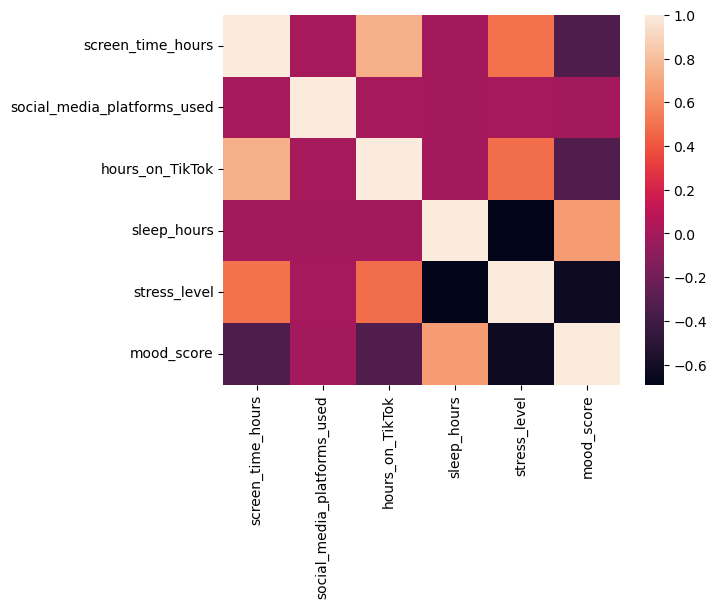

In [18]:
sns.heatmap(df.corr())

It is noted that featuers like hours_on_TikTok and screen_time is high correlation. ALso, mood_score and sleep_hours have 0.66 correlation. There is 
a mediam correlation between screen_time and stress_level. There is mediam correlation between stress_level and hours_on_TikTok.  

In [20]:
df.groupby('social_media_platforms_used')['stress_level'].mean()

social_media_platforms_used
1    6.176107
2    6.162035
3    6.184095
4    6.176272
5    6.199360
Name: stress_level, dtype: float64

In [21]:
df.groupby('social_media_platforms_used')['mood_score'].mean()

social_media_platforms_used
1    9.057191
2    9.056537
3    9.065656
4    9.069252
5    9.055180
Name: mood_score, dtype: float64

Gen Z mood or stress levels do not get effect by the number of social media they use. 

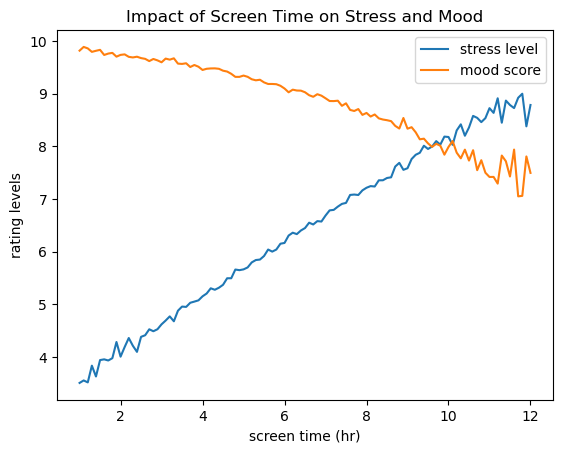

In [23]:
plt.plot(df.groupby('screen_time_hours')['stress_level'].mean())
plt.plot(df.groupby('screen_time_hours')['mood_score'].mean())
plt.title('Impact of Screen Time on Stress and Mood')
plt.xlabel('screen time (hr)')
plt.ylabel('rating levels')
plt.legend(['stress level', 'mood score'])

As screen time increases, there’s a noticeable upward trend in stress levels. Additionally, while the mood score tends to decrease with increased 
screen time, the decline is gradual and not as steep as the rise in stress levels.there’s a unique fluctuation around the 11th and 12th hour mark. 
During this period, both metrics show unexpected changes — with stress briefly decreasing and mood scores slightly improving.

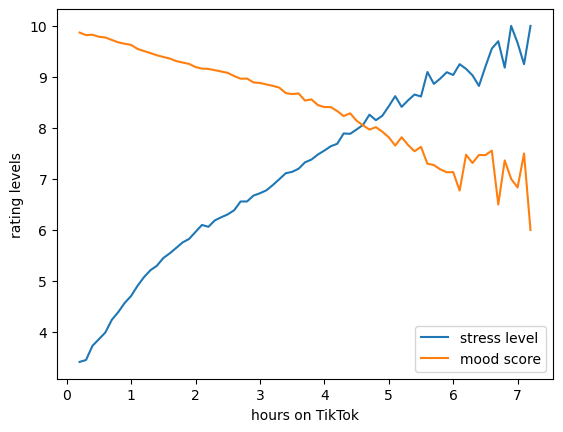

In [25]:
plt.plot(df.groupby('hours_on_TikTok')['stress_level'].mean())
plt.plot(df.groupby('hours_on_TikTok')['mood_score'].mean())
plt.xlabel('hours on TikTok')
plt.ylabel('rating levels')
plt.legend(['stress level', 'mood score'])

Same trend happens with TikTok 

# The unusual dips or spikes could happend becuase
Could be due to breaks in screen time (watching relaxing content, chatting with friends)
Might involve a small sample size at those hours, making averages unstable
Could reflect a behavioral shift, like people winding down before sleep

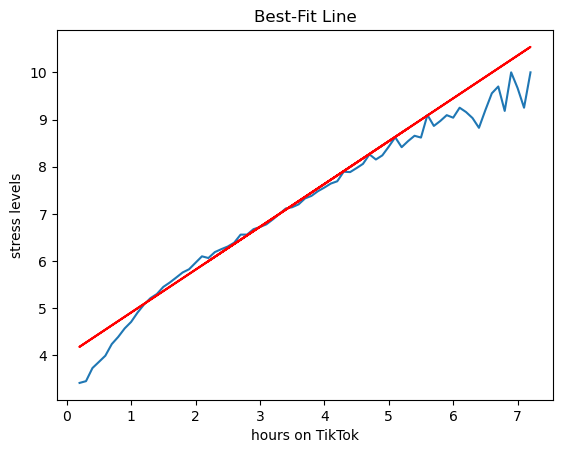

In [28]:
# Get slope and intercept of best-fit line
slope, intercept = np.polyfit(df['hours_on_TikTok'], df['stress_level'], 1)

# Plot with best-fit line
plt.plot(df.groupby('hours_on_TikTok')['stress_level'].mean())
plt.plot(df['hours_on_TikTok'], slope*df['hours_on_TikTok'] + intercept, color='red')
plt.title('Best-Fit Line')
plt.xlabel('hours on TikTok')
plt.ylabel('stress levels')
plt.show()

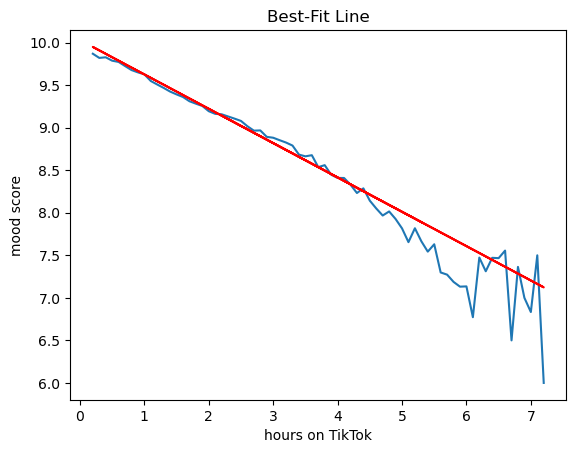

In [29]:
# Get slope and intercept of best-fit line
slope, intercept = np.polyfit(df['hours_on_TikTok'], df['mood_score'], 1)

# Plot with best-fit line
plt.plot(df.groupby('hours_on_TikTok')['mood_score'].mean())
plt.plot(df['hours_on_TikTok'], slope*df['hours_on_TikTok'] + intercept, color='red')
plt.title('Best-Fit Line')
plt.xlabel('hours on TikTok')
plt.ylabel('mood score')
plt.show()

# Conclusion  

Yes, social media affects Gen Z — more screen time → higher stress, lower mood.

Sleep matters — more sleep = better mood, less stress.
    
Number of platforms doesn’t matter — the time spent matters more than variety.
    
TikTok is a major factor — hours on TikTok are highly correlated with total screen time.

Mood & screen time — mood declines gradually as screen time increases. However mood nor stress gets affected dramatically.

Stress & screen time — stress rises with more screen time, small dip around 11–12 hours.

The unusual dips or spikes could happen because due to breaks in screen time (watching relaxing content, chatting with friends) Might involve a small 
sample size at those hours, making averages unstable Could reflect a behavioral shift, like people winding down before sleep.
